In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
import pandas as pd

digits_df = pd.DataFrame(digits.data)
digits_df['target'] = digits.target
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_df.drop(['target'], axis='columns'), digits_df.target, test_size=0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
model.score(X_test, y_test)

0.9833333333333333

In [6]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

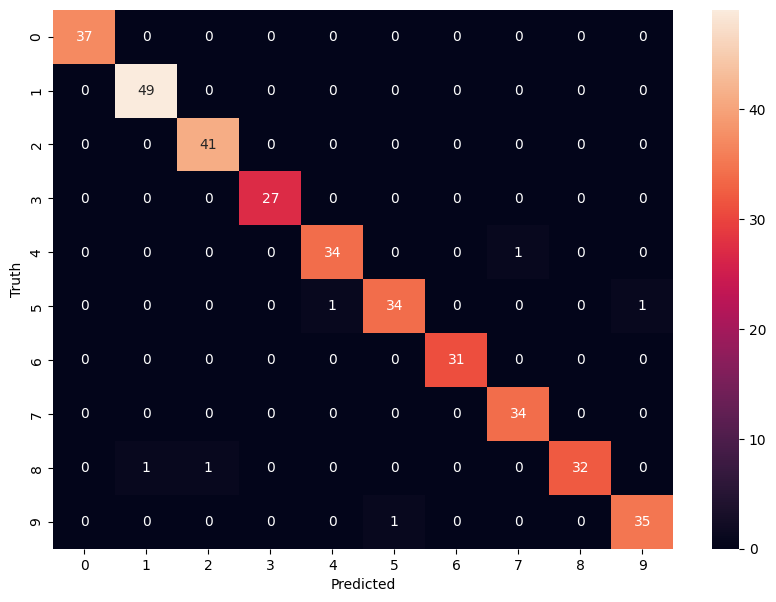

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

# IRIS Detection using Random Forest Classifier

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()

In [18]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['flower_name'] = iris_df.target.apply(lambda x: iris.target_names[x])

iris_df.rename(
    columns={
        'sepal length (cm)': 'sepal_length',
        'sepal width (cm)': 'sepal_width',
        'petal length (cm)': 'petal_length',
        'petal width (cm)': 'petal_width'
    },
    inplace=True
)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


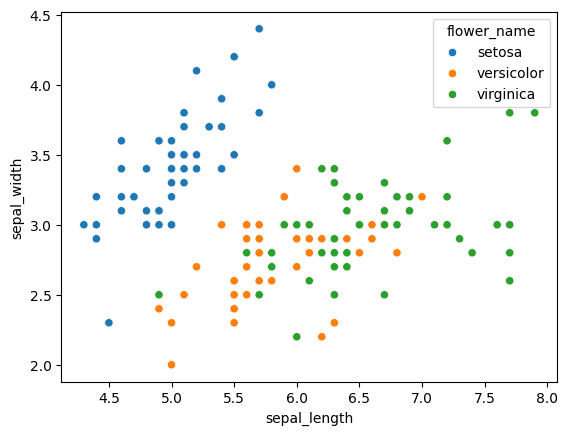

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn's scatterplot function
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    hue='flower_name',  # Use hue for categorical coloring
    data=iris_df,    # Provide the DataFrame
    marker='o',          # Set the marker style
    color='green'       # Set the color if you want a uniform color
)

plt.show()  # Display the plot

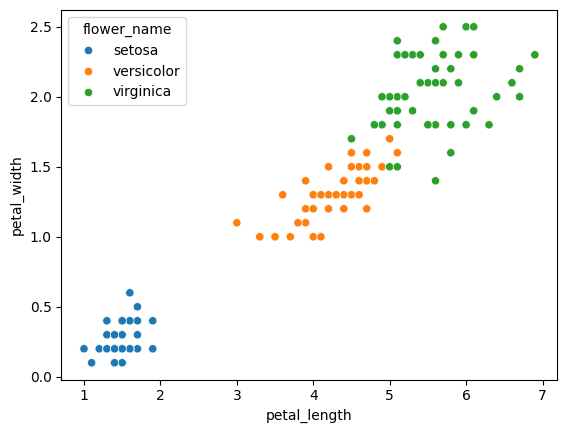

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn's scatterplot function
sns.scatterplot(
    x='petal_length',
    y='petal_width',
    hue='flower_name',  # Use hue for categorical coloring
    data=iris_df,    # Provide the DataFrame
    marker='o',          # Set the marker style
    color='green'       # Set the color if you want a uniform color
)

plt.show()  # Display the plot


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_df.drop(['target', 'flower_name'], axis='columns'),
    iris_df.target,
    test_size=0.2
)

In [40]:
from sklearn.ensemble import RandomForestClassifier

iris_model = RandomForestClassifier(n_estimators=30)
iris_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [41]:
iris_model.score(X_test, y_test)

0.9666666666666667

In [42]:
from sklearn.metrics import confusion_matrix

y_predicted = iris_model.predict(X_test)
cf = confusion_matrix(y_test, y_predicted)
cf

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  8]])

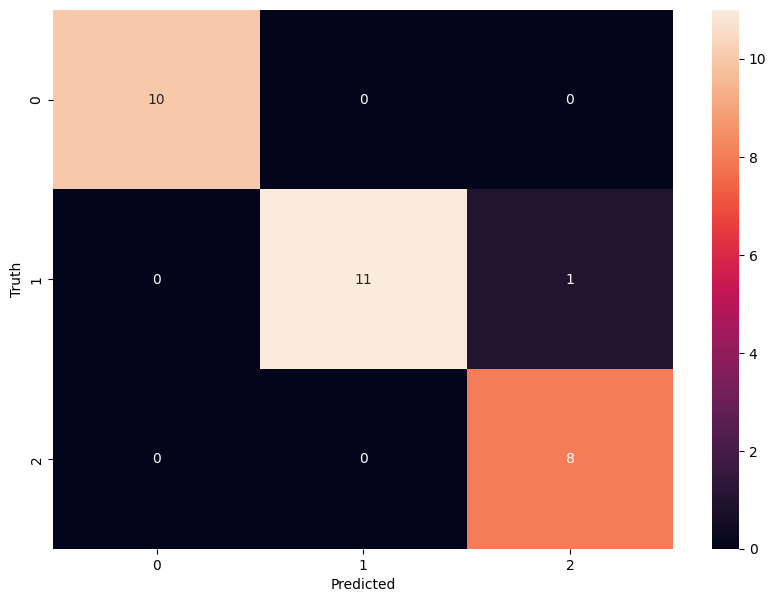

In [43]:
plt.figure(figsize=(10,7))
sn.heatmap(cf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');